# (4주차) 10월7일
> 신경망의 표현력 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 윤도현

# Logistic regression

In [29]:
import torch 
import matplotlib.pyplot as plt

### example

`-` 현실에서 이런 경우가 많음 

`-` x가 커질수록(혹은 작아질수록) 성공확률이 증가함.

`-` 이러한 모형은 아래와 같이 설계할 수 있음 <----외우세요!

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$


- $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$ 


- $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$ <--- 외우세요!!

`-` 예제시작

In [30]:
X = torch.linspace(-1,1,2000).reshape(2000,1)
w0 = -1
w1 = 5
u = w0+X*w1
v = torch.exp(u)/(1+torch.exp(u))
y= torch.bernoulli(v)

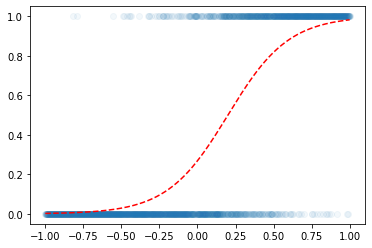

In [31]:
plt.scatter(X,y, alpha=0.05)
plt.plot(X,v,'--r')

`-` 다이어그램으로 표현하면

In [32]:
import graphviz

In [33]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

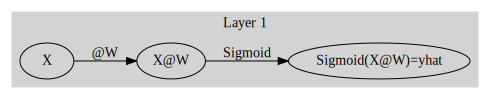

In [34]:
#collapse
gv('''
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "X" 
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "X" -> "X@W"[label="@W"]
    "X@W" -> "Sigmoid(X@W)=yhat"[label="Sigmoid"]
    label = "Layer 1"
}
''')

`-` 아키텍처, 손실함수, 옵티마이저

In [35]:
torch.manual_seed=(43052)
l1= torch.nn.Linear(in_features=1, out_features=1, bias=True)
a1=torch.nn.Sigmoid()
net= torch.nn.Sequential(l1,a1)

#loss = torch.mean((y-yhat)**2) << 이러면 안됩니다!!!!
optimizer= torch.optim.SGD(net.parameters(),lr=0.05)

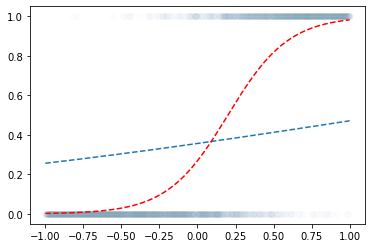

In [36]:
plt.scatter(X,y,alpha=0.01)
plt.plot(X,net(X).data,'--')
plt.plot(X,v,'--r')

`-` step 1~4 반복


In [37]:
for epoc in range(10000):
    #step1
    yhat=net(X)
    
    #step2
    loss=-torch.mean(y*torch.log(yhat)+(1-y)*torch.log(1-yhat))
    
    #step3
    loss.backward()
    
    #step4
    optimizer.step()
    net.zero_grad()

In [38]:
list(net.parameters())

[Parameter containing:
 tensor([[5.0906]], requires_grad=True),
 Parameter containing:
 tensor([-1.1216], requires_grad=True)]

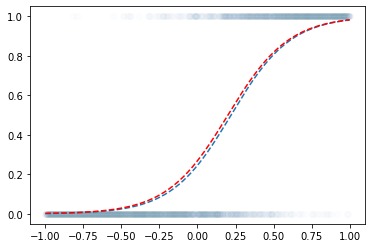

In [39]:
plt.scatter(X,y,alpha=0.01)
plt.plot(X,net(X).data,'--')
plt.plot(X,v,'--r')

# 숙제!!!!!

In [47]:
torch.manual_seed=(43052)
l1= torch.nn.Linear(in_features=1, out_features=1, bias=True)
a1=torch.nn.Sigmoid()
net= torch.nn.Sequential(l1,a1)

loss_fn= torch.nn.MSELoss()
optimizer= torch.optim.SGD(net.parameters(),lr=0.05)

In [48]:
for epoc in range(10000):
    #step1
    yhat=net(X)
    
    #step2
    loss=loss_fn(y,yhat)
    
    #step3
    loss.backward()
    
    #step4
    optimizer.step()
    net.zero_grad()

In [49]:
list(net.parameters())

[Parameter containing:
 tensor([[4.4260]], requires_grad=True),
 Parameter containing:
 tensor([-0.9737], requires_grad=True)]

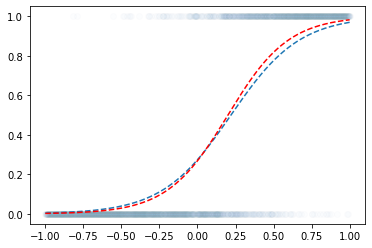

In [50]:
plt.scatter(X,y,alpha=0.01)
plt.plot(X,net(X).data,'--')
plt.plot(X,v,'--r')